In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
iris = pd.read_csv('data/iris.csv')

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


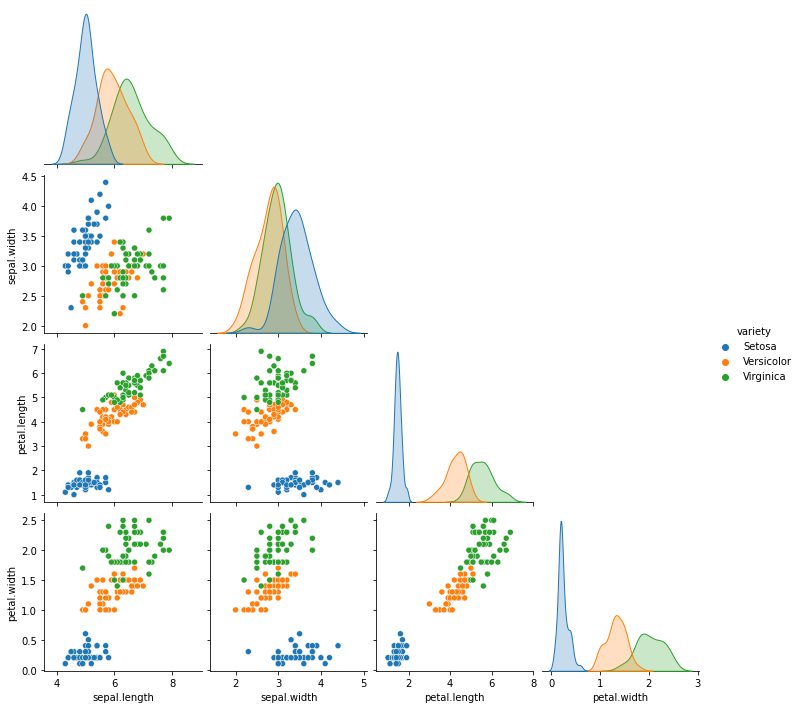

In [4]:
sns.pairplot(iris, vars=iris.columns[:-1], hue='variety', corner=True)
plt.show()

In [5]:
iris_no_versicolor = iris[iris.variety != 'Versicolor']

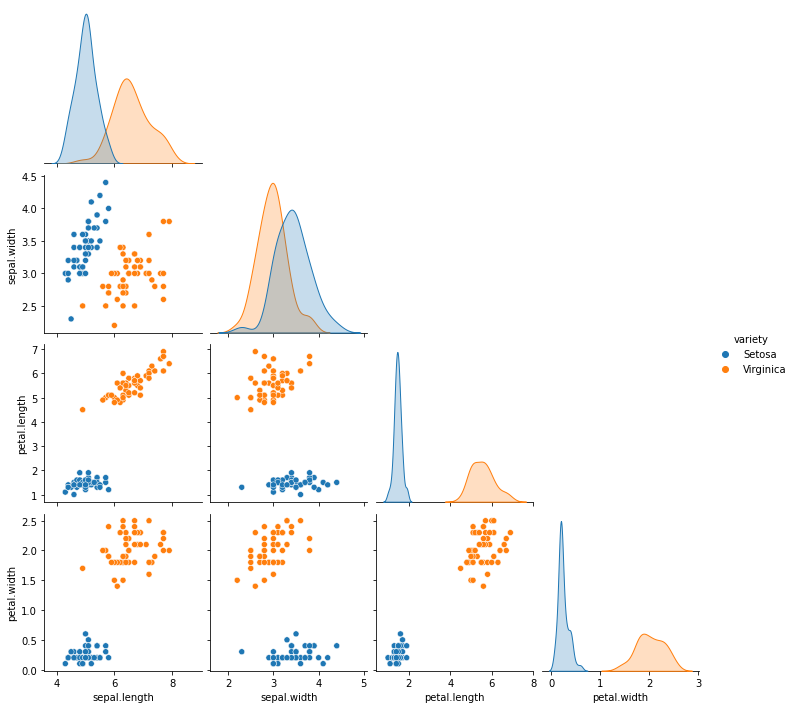

In [6]:
sns.pairplot(iris_no_versicolor, vars=iris_no_versicolor.columns[:-1], hue='variety', corner=True)
plt.show()

In [7]:
class Perceptron:
    # __weights_vector: np.ndarray

    def __init__(self, number_of_inputs: int, learning_rate: float):
        self.weights_vector = np.random.random(number_of_inputs)
        self.theta = np.random.random()
        self.alpha = learning_rate

    def __call__(self, vector: np.ndarray):
        if np.sum(self.weights_vector * vector) >= self.theta:
            return 1
        return 0

    def train(self, vector: np.ndarray, expected_outcome: int) -> None:
        extended_weights = np.append(self.weights_vector, self.theta)
        extended_vector = np.append(vector, -1)

        new_weights : np.ndarray = extended_weights + (expected_outcome - self(vector)) * self.alpha * extended_vector
        self.theta = new_weights[-1]
        self.weights_vector = new_weights[:-1]

    def __str__(self) -> str:
        return f'Perceptron: weights={self.weights_vector}; theta={self.theta}'




In [8]:
perceptron = Perceptron(4, 1)
perceptron.weights_vector = np.array([-1,0,1,2])
perceptron.theta = 1

print(perceptron(np.array([1,2,2,-1])))
print(perceptron)
perceptron.train(np.array([1,2,2,-1]), 1)
print(perceptron)

0
Perceptron: weights=[-1  0  1  2]; theta=1
Perceptron: weights=[0 2 3 1]; theta=0


In [9]:
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')

    iris_no_versicolor.loc[:, 'variety'] = iris_no_versicolor.variety.apply(lambda x: 1 if x == 'Setosa' else 0)
iris_no_versicolor.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [10]:
test_set = pd.concat([iris_no_versicolor[iris_no_versicolor.variety == 1].sample(n=35),
                      iris_no_versicolor[iris_no_versicolor.variety == 0].sample(n=35)])
train_set = iris_no_versicolor.drop(index=test_set.index)

In [11]:
def test_perceptron(perceptron: Perceptron, data: np.ndarray, expected_values: np.ndarray) -> float:
    results = np.array([])

    for vector in data:
        results = np.append(results, perceptron(vector))

    return sum(results == expected_values) / len(expected_values)

In [12]:
for alpha in range(0.00001)

perceptron = Perceptron(4, .0001)

data = train_set.iloc[:, :-1].to_numpy()
expected_values = train_set.iloc[:, -1].to_numpy()

test_data = test_set.iloc[:, :-1].to_numpy()
test_expected_values = test_set.iloc[:, -1].to_numpy()

for i in range(100):
    for vector, expected_value in zip(data, expected_values):
        perceptron.train(vector, expected_value)

    print(perceptron, end=' ')
    print(str(test_perceptron(perceptron, test_data, test_expected_values) * 100) + '%')

Perceptron: weights=[0.04889553 0.90474464 0.45441519 0.8142587 ]; theta=0.10056959921747831 50.0%
Perceptron: weights=[0.03906553 0.90032464 0.44599519 0.8112187 ]; theta=0.10206959921747835 50.0%
Perceptron: weights=[0.02923553 0.89590464 0.43757519 0.8081787 ]; theta=0.1035695992174784 50.0%
Perceptron: weights=[0.01940553 0.89148464 0.42915519 0.8051387 ]; theta=0.10506959921747844 50.0%
Perceptron: weights=[0.00957553 0.88706464 0.42073519 0.8020987 ]; theta=0.10656959921747848 50.0%
Perceptron: weights=[-2.54474530e-04  8.82644636e-01  4.12315187e-01  7.99058699e-01]; theta=0.10806959921747852 50.0%
Perceptron: weights=[-0.01008447  0.87822464  0.40389519  0.7960187 ]; theta=0.10956959921747857 50.0%
Perceptron: weights=[-0.01991447  0.87380464  0.39547519  0.7929787 ]; theta=0.11106959921747861 50.0%
Perceptron: weights=[-0.02974447  0.86938464  0.38705519  0.7899387 ]; theta=0.11256959921747865 50.0%
Perceptron: weights=[-0.03957447  0.86496464  0.37863519  0.7868987 ]; theta=0